<ipython-input-13-5d7b053e97db>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


GPT-2 Response: New anomaly detected in vendor-srv-1 at 2023-12-01 00:00:00. CPU usage: 37.39%, Memory usage: 72.14%. What is the likely cause and solution?

The following is a list of possible causes of the anomaly.
.NET Framework 4.5.1 or later. The following are the possible cause of this anomaly:
, .NET Core 2.0 or earlier. This is an issue with the .Net Framework. It is not a problem with .Core.dll. If you have a .dll file that is missing, please contact the vendor. Please note that the following issues are not present in the current version of .net. You can find the latest version by running the command: $ ./configure --prefix=<your-package> --enable-runtime-interop-enable=1 --disable-thread-error-logging --debug-debugger-info --help
 (Note: The .core.exe file is located in /usr/local/bin/core-core and is installed by default on Windows 7 and later.)
: . . Core.Core is required for the Core Framework to work. To install


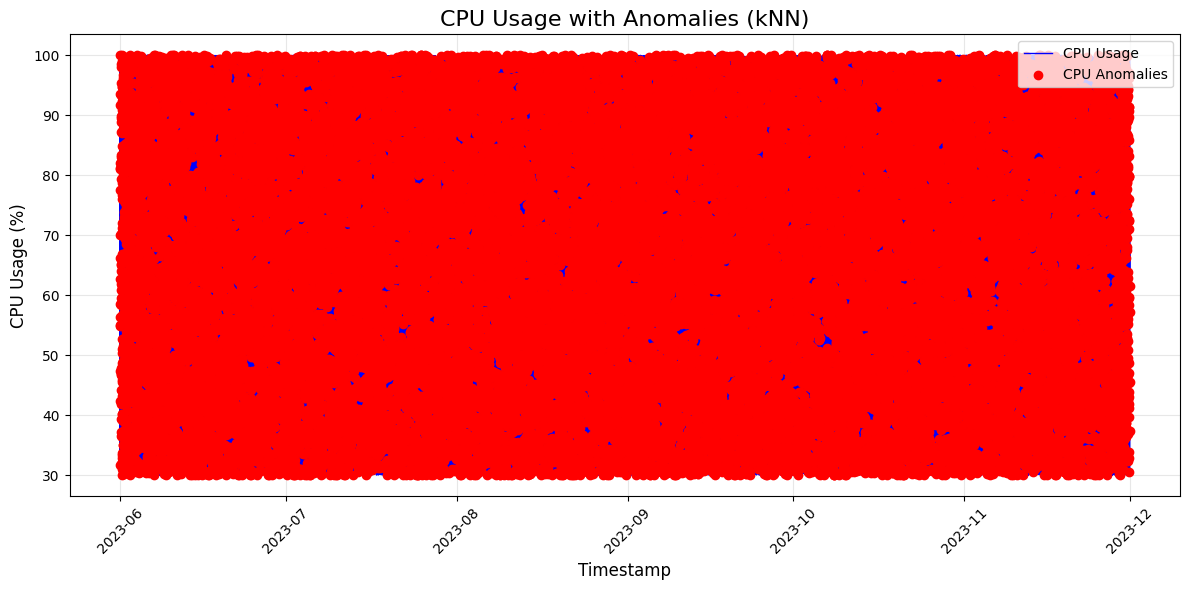

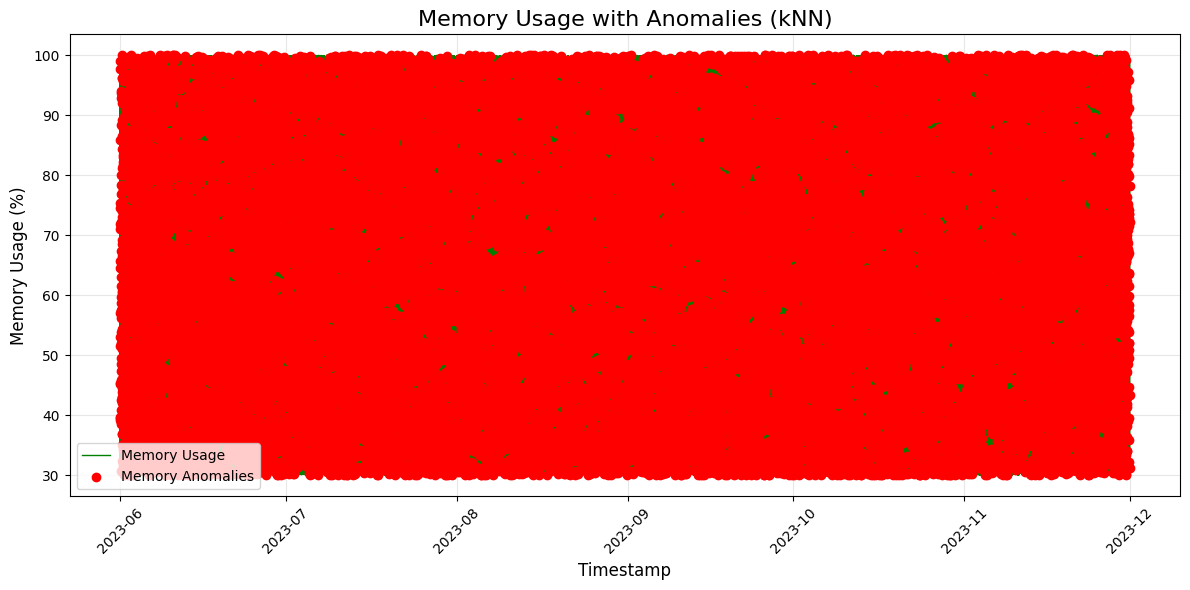

In [13]:
import pandas as pd
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# ------------------ Load Data ------------------
def load_data(file_path='/content/synthetic_data (3).csv'):
    synthetic_data = pd.read_csv(file_path)
    synthetic_data['timestamp'] = pd.to_datetime(synthetic_data['timestamp'])
    synthetic_data.sort_values(by='timestamp', inplace=True)
    return synthetic_data

# ------------------ Process Data ------------------
def process_data(data):
    data.fillna(method='ffill', inplace=True)
    return data

# ------------------ Train Model with Test Data ------------------
def train_model_with_test_data(data, k=5):
    metrics_features = data[['cpu_usage', 'memory_usage']]
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(metrics_features)
    distances, _ = knn.kneighbors(metrics_features)
    mean_distances = distances.mean(axis=1)
    threshold = np.percentile(mean_distances, 95)
    data['anomaly'] = (mean_distances > threshold).astype(int)
    return data

# ------------------ Train Model with Clean Data ------------------
def train_model_with_clean_data(data):
    detected_anomalies = data[data['anomaly'] == 1]
    cpu_anomalies = detected_anomalies[detected_anomalies['cpu_usage'] > detected_anomalies['memory_usage']]
    memory_anomalies = detected_anomalies[detected_anomalies['memory_usage'] > detected_anomalies['cpu_usage']]
    return cpu_anomalies, memory_anomalies

# ------------------ Build Model ------------------
def build_model(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['timestamp'], data['cpu_usage'], label='CPU Usage', color='blue', linewidth=1)
    cpu_anomalies = data[data['anomaly'] == 1]
    plt.scatter(cpu_anomalies['timestamp'], cpu_anomalies['cpu_usage'], color='red', label='CPU Anomalies', zorder=3)
    plt.title('CPU Usage with Anomalies (kNN)', fontsize=16)
    plt.xlabel('Timestamp', fontsize=12)
    plt.ylabel('CPU Usage (%)', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(data['timestamp'], data['memory_usage'], label='Memory Usage', color='green', linewidth=1)
    memory_anomalies = data[data['anomaly'] == 1]
    plt.scatter(memory_anomalies['timestamp'], memory_anomalies['memory_usage'], color='red', label='Memory Anomalies', zorder=3)
    plt.title('Memory Usage with Anomalies (kNN)', fontsize=16)
    plt.xlabel('Timestamp', fontsize=12)
    plt.ylabel('Memory Usage (%)', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# ------------------ GPT Integration ------------------
def gpt_integration(data):
    # Load GPT-2 model and tokenizer
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    tokenizer.pad_token = tokenizer.eos_token
    model.config.pad_token_id = tokenizer.pad_token_id

    # Prepare prompt based on detected anomalies
    recent_anomaly = data[data['anomaly'] == 1].iloc[-1]
    prompt = (f"New anomaly detected in {recent_anomaly['service_name']} at {recent_anomaly['timestamp']}. "
              f"CPU usage: {recent_anomaly['cpu_usage']:.2f}%, "
              f"Memory usage: {recent_anomaly['memory_usage']:.2f}%. "
              "What is the likely cause and solution?")

    # Generate response from GPT-2
    inputs = tokenizer.encode(prompt, return_tensors='pt', max_length=1024, truncation=True)
    outputs = model.generate(
        inputs,
        max_length=250,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        pad_token_id=tokenizer.pad_token_id
    )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print("GPT-2 Response:", response)

# ------------------ Main Script ------------------
if __name__ == "__main__":
    # Load data
    data = load_data()

    # Process data
    processed_data = process_data(data)

    # Train model with test data
    anomaly_detected_data = train_model_with_test_data(processed_data)

    # Train model with clean data
    cpu_anomalies, memory_anomalies = train_model_with_clean_data(anomaly_detected_data)

  # GPT integration
    gpt_integration(anomaly_detected_data)

    # Build model
    build_model(anomaly_detected_data)


